In [1]:
# Christine Orosco
# Study social hierarchies within a group of 20 Baboons at the Primate Center in France.
# Data set is a result of the Case Study conducted and published in the paper:
# Gelardi, V., Godard, J., Paleressompoulle, D., Claidiere, N., & Barrat, A. (2020). 
# Measuring social networks in primates: wearable sensors versus direct observations. 
# Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences, 
# 476(2236), 20190737. https://doi.org/10.1098/rspa.2019.0737
# Retrieved from https://royalsocietypublishing.org/doi/10.1098/rspa.2019.0737 Jan 15th 2021
# Dataset OBS_data.txt
# Data release date Dec4, 2020. Availale at http://www.sociopatterns.org/datasets/baboons-interactions/
# The entire group consisted of 19 individuals (7 males and 12 females) aged from 1 to 23 years old. 

In [2]:
# Case Study to predict Sex, Dominant Male, and Family groups

# 1 - Based upon the behavior can we predict the Sex. Sex is the target variable

# 2 - Based upon the behavior can we predict the dominant male 
# Identify dominant male by behavior - based upon the type of behavior and occurences of each type

# 3 - Based upon the behavior can we identify sub-groups
# look at the clustering of subgroups and the behaviors associated with each group.
# Would expect a family group to exhibit carrying, grooming, and touching more so than non family groups. i.e mother-child

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt

import networkx as nx
from networkx import connected_components
import networkx.algorithms.community as nxcom
import seaborn as sns
import graphviz
import pygraphviz
from networkx.algorithms import approximation as approx
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import sklearn
from pprint import pprint
import warnings 
warnings.filterwarnings('ignore')

## Load and Clean the data

In [2]:
# load the data from your dataset using the pandas library
df = pd.read_excel('~/DSC550/OBS_data.xls',  header=0)

df1 = df[['Actor', 'Recipient', 'Behavior']].copy()

In [3]:
# If Recipient == Nan replace with UNKNOWN
# If Actor == NaN replace with UNK_Actor
df1.loc[df['Recipient'].isnull(), 'Recipient' ] = 'UNKNOWN'
df1.loc[df['Actor'].isnull(), 'Actor' ] = 'VIVIEN'

In [4]:
# Change SELF with name of Actor
df1.loc[df['Recipient'] == 'SELF', 'Recipient' ] = df['Actor']

In [5]:
# Add Sex column for females

names = ['VIOLETTE','ANGELE','ARIELLE','FEYA','FANA', 'ATMOSPHERE', 'PETOULETTE' , 'KALI', 'LIPS', 'NEKKE', 'VIVIEN', 'LOME', 'MALI']

for x in names:    
    df1.loc[df['Actor'] == x, 'Sex'] = 2


In [6]:
# Add the Sex column for males

names = ['EWINE','PIPO','FELIPE', 'BOBO', 'MAKO' , 'HARLEM', 'MUSE']

for x in names:    
    df1.loc[df['Actor'] == x, 'Sex'] = 1


In [7]:
# for any NaN make them a male
df1.loc[df1['Sex'].isnull(), 'Sex' ] = 1


In [8]:
# Convert Sex to int
df1['Sex'] = df1['Sex'].astype(int)
df1.query('Sex == 0')

,Actor,Recipient,Behavior,Sex


In [9]:
# Replace NaN in behavior with Playing with
df1.loc[df['Behavior'].isnull(), 'Behavior'] = 'Playing with'

In [10]:
# Create subsets to plot links and nodes
df2 = df1[['Actor','Recipient']].copy()

# Remove UNKNOWN and where Actor = Recipient

df2 = df2[(df2['Recipient'] != 'UNKNOWN')].copy()

# Remove SELF links
df2 = df2[(df2['Recipient'] != df2['Actor'])].copy()


## Create network graphs

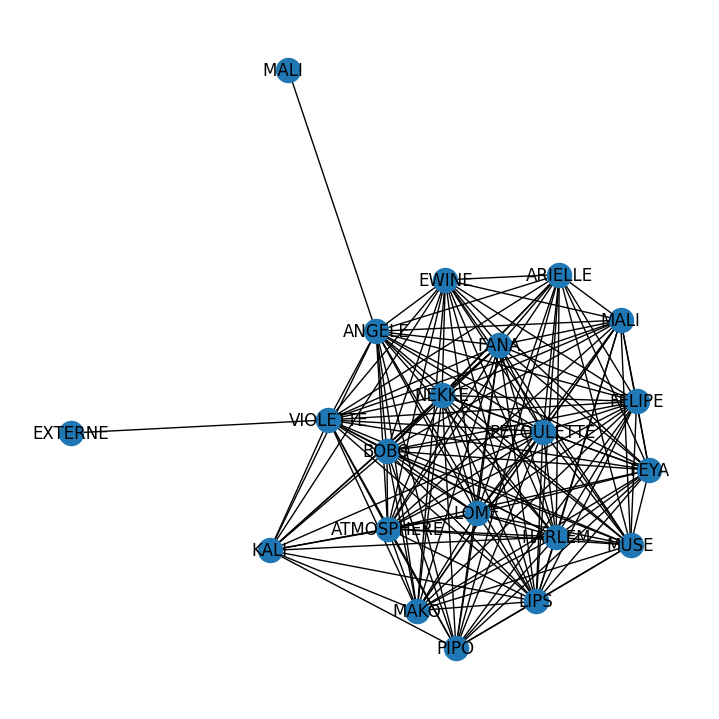

In [11]:
# Plot the network using networkx. Use graphviz to render the networkx graph

g = nx.Graph()
g = nx.from_pandas_edgelist(df2, source='Actor', target='Recipient')

plt.figure(figsize =(7, 7))
pos = nx.nx_agraph.graphviz_layout(g)
nx.draw(g,  pos=pos, with_labels=True)


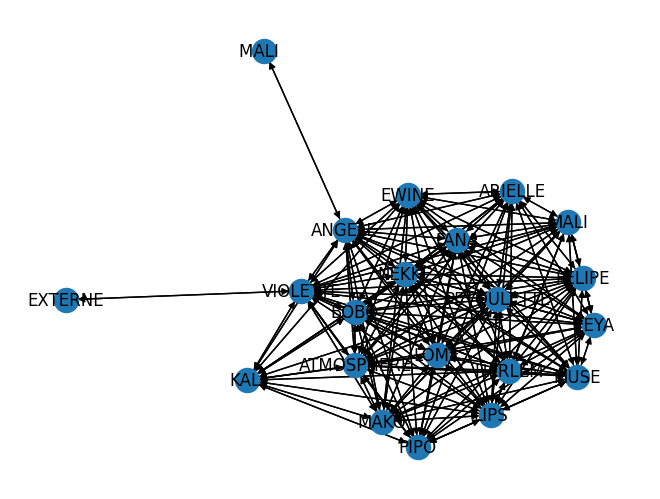

In [12]:
DG = nx.DiGraph(g)
nx.draw(DG,  pos=pos, with_labels=True)

In [13]:
# Print the number of connections per node
# Find the highly connected nodes that may suggest family groups because of the number of links and dominant male with the number of links

# create connection dict
conn = {}

# for each node in graph g get the number of connections to the that node
for x in g.nodes:
    conn[x] = len(g[x])
    s = pd.Series(conn, name='connections')
    conn_df = s.to_frame().sort_values('connections', ascending=False)
conn_df   

,connections
ANGELE,19
VIOLETTE,19
PETOULETTE,18
LIPS,18
NEKKE,18
LOME,18
BOBO,18
ATMOSPHERE,18
FANA,18
HARLEM,18


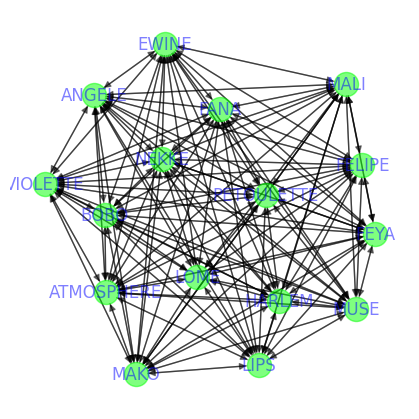

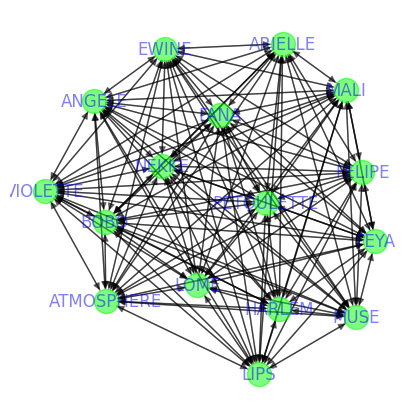

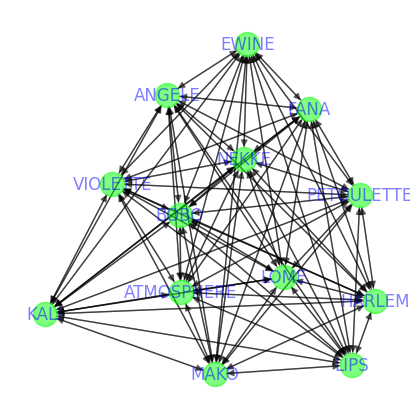

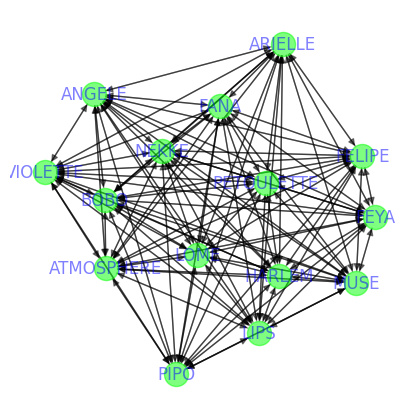

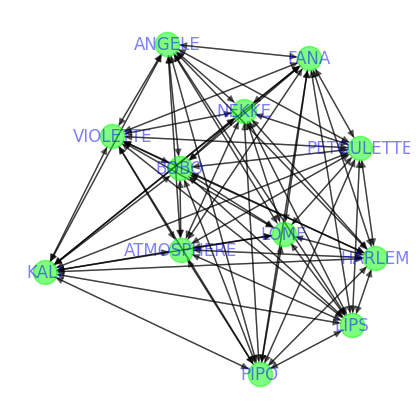

In [14]:
# Find cliques to further refine network subsets

cliques = list(nx.find_cliques(g))

triangles = [clique for clique in cliques if len(clique) > 3]
x_tri = len(triangles)
for n in range(x_tri):
    plt.figure(figsize =(4, 4))
    nx.draw(DG.subgraph(triangles[n]), pos=pos, with_labels=True, node_color="lime", font_color="blue", alpha=.5)


In [15]:
# https://graphsandnetworks.com/community-detection-using-networkx/
# Find the communities

communities = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)

# Count the communities

print(f"The Baboon group has {len(communities)} communities.")

The Baboon group has 3 communities.


In [16]:
# show the clustering
nx.clustering(g)

{'ANGELE': 0.8421052631578947,
 'FELIPE': 0.9705882352941176,
 'LIPS': 0.9411764705882353,
 'NEKKE': 0.9411764705882353,
 'LOME': 0.9411764705882353,
 'BOBO': 0.9411764705882353,
 'ATMOSPHERE': 0.9411764705882353,
 'FEYA': 0.9705882352941176,
 'PIPO': 0.9619047619047619,
 'KALI': 0.9743589743589743,
 'MUSE': 0.9705882352941176,
 'MAKO': 0.9666666666666667,
 'MALI': 0.9916666666666667,
 'PETOULETTE': 0.9411764705882353,
 'ARIELLE': 0.9833333333333333,
 'VIOLETTE': 0.8421052631578947,
 'HARLEM': 0.9411764705882353,
 'FANA': 0.9411764705882353,
 'EWINE': 0.9558823529411765,
 'EXTERNE': 0,
 'MALI  ': 0}

In [17]:
node_cc = nx.algorithms.approximation.all_pairs_node_connectivity(g)


In [18]:
# Compute node independent paths between two nodes using the shortest path.
approx.local_node_connectivity(g,'VIOLETTE', 'NEKKE' )

18

In [19]:
approx.local_node_connectivity(g,'VIOLETTE', 'PIPO' )

15

In [20]:
# define community attribute functions to plot the communities

def set_node_community(g, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            g.nodes[v]['community'] = c + 1

def set_edge_community(g):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in g.edges:
        if g.nodes[v]['community'] == g.nodes[w]['community']:
            # Internal edge, mark with community
            g.edges[v, w]['community'] = g.nodes[v]['community']
        else:
            # External edge, mark as 0
            g.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    gn = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, gn, b)            

In [21]:
# Set node and edge communities

set_node_community(g, communities)
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)

external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = ['blue' for e in internal]
external_color = ['red' for e in external]

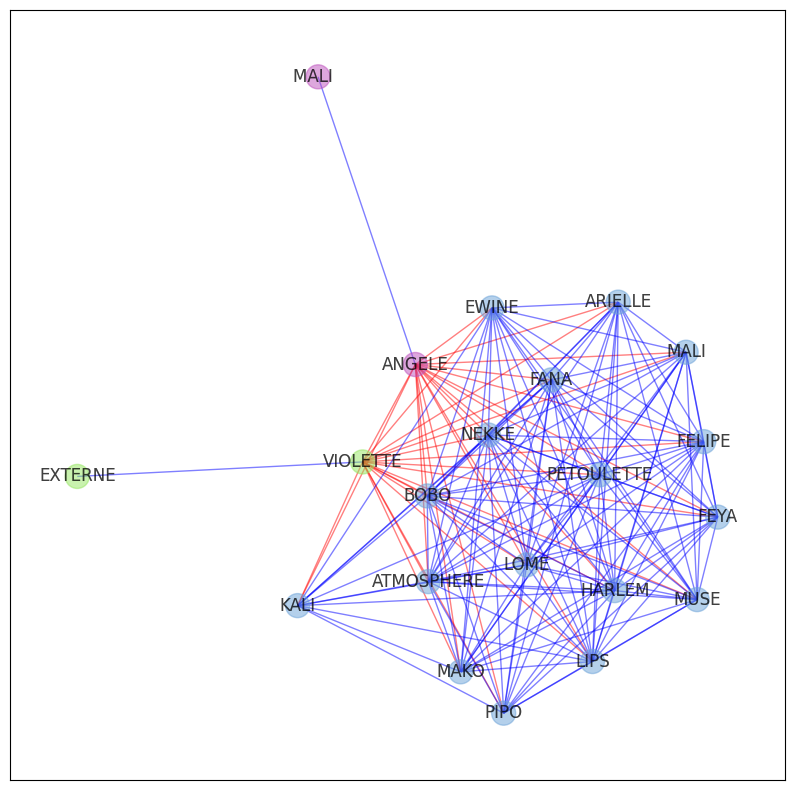

In [22]:
# Plot each community with different colors for the nodes

g_pos = nx.spring_layout(g)

plt.rcParams.update({'figure.figsize': (10, 10)})

# Draw external edges

nx.draw_networkx(
        g,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color=external_color,
        alpha=0.5)
# Draw nodes and internal edges

nx.draw_networkx(
        g,
        pos=pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color,
        alpha=0.5)
plt.show()

In [23]:
# Communities using Girvan Newman algorithm

result = nxcom.girvan_newman(g)
communities = next(result)
len(communities)

2

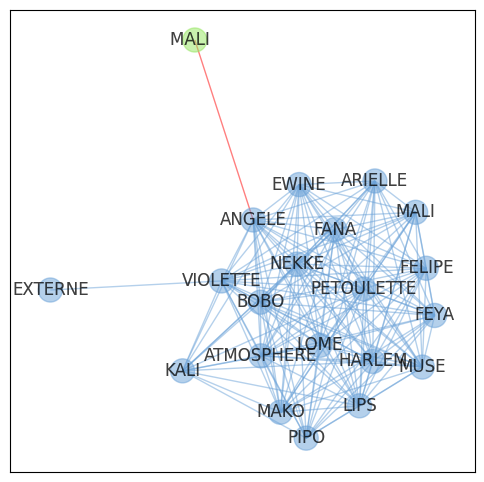

In [24]:
# Draw the communities from the Girvan-Newman algorithm

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 10)})

# Set node and edge communities

set_node_community(g, communities)
set_edge_community(g)

# Set community color for nodes
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for internal edges

external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]

g_pos = nx.spring_layout(g)

plt.rcParams.update({'figure.figsize': (6, 6)})

# Draw external edges

nx.draw_networkx(
        g,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color=external_color,
        alpha=0.5)

# Draw nodes and internal edges

nx.draw_networkx(
        g,
        pos=pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color,
        alpha=0.5)
plt.show()

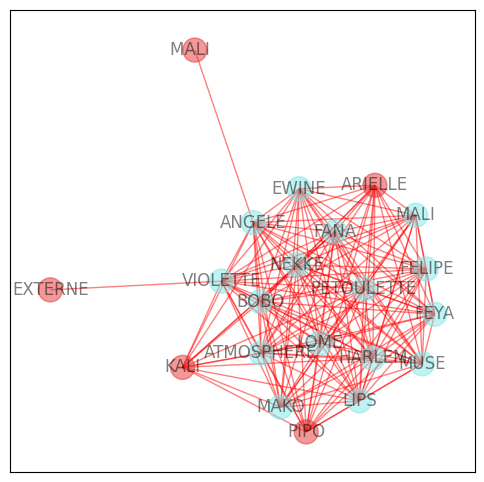

In [25]:
# Plot number of cliques

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (6, 6)})

cliques = list(nx.find_cliques(g))

max_clique = max(cliques, key=len)
node_color = [(0.5, 0.9, 0.3) for v in g.nodes()]

for i, v in enumerate(g.nodes()):
    if v in max_clique:
        node_color[i] = (.5, 0.9, 0.9)
        edge_color='blue'
    else:
        node_color[i] = (.9, 0.2, 0.2)
        edge_color='red' 
nx.draw_networkx(g, node_color=node_color, edge_color=edge_color, pos=pos, alpha=.5)
plt.show()

In [26]:
# Degree Centrality

sorted(nx.degree_centrality(g).items(), key=lambda x : x[1], reverse=True)

[('ANGELE', 0.9500000000000001),
 ('VIOLETTE', 0.9500000000000001),
 ('LIPS', 0.9),
 ('NEKKE', 0.9),
 ('LOME', 0.9),
 ('BOBO', 0.9),
 ('ATMOSPHERE', 0.9),
 ('PETOULETTE', 0.9),
 ('HARLEM', 0.9),
 ('FANA', 0.9),
 ('FELIPE', 0.8500000000000001),
 ('FEYA', 0.8500000000000001),
 ('MUSE', 0.8500000000000001),
 ('EWINE', 0.8500000000000001),
 ('MAKO', 0.8),
 ('MALI', 0.8),
 ('ARIELLE', 0.8),
 ('PIPO', 0.75),
 ('KALI', 0.65),
 ('EXTERNE', 0.05),
 ('MALI  ', 0.05)]

In [27]:
# betweenness centrality refers to a number of shortest paths that pass through that node.

sorted(nx.betweenness_centrality(g, normalized=False).items(), key=lambda x : x[1], reverse=True)

[('ANGELE', 19.673626373626373),
 ('VIOLETTE', 19.673626373626373),
 ('LIPS', 0.6736263736263736),
 ('NEKKE', 0.6736263736263736),
 ('LOME', 0.6736263736263736),
 ('BOBO', 0.6736263736263736),
 ('ATMOSPHERE', 0.6736263736263736),
 ('PETOULETTE', 0.6736263736263736),
 ('HARLEM', 0.6736263736263736),
 ('FANA', 0.6736263736263736),
 ('EWINE', 0.4641025641025641),
 ('PIPO', 0.31410256410256415),
 ('MAKO', 0.31410256410256415),
 ('FELIPE', 0.27619047619047615),
 ('FEYA', 0.27619047619047615),
 ('MUSE', 0.27619047619047615),
 ('KALI', 0.1380952380952381),
 ('ARIELLE', 0.1380952380952381),
 ('MALI', 0.06666666666666667),
 ('EXTERNE', 0.0),
 ('MALI  ', 0.0)]

In [28]:
# Normalize Values

sorted(nx.betweenness_centrality(g).items(), key=lambda x : x[1], reverse=True)

[('ANGELE', 0.10354540196645459),
 ('VIOLETTE', 0.10354540196645459),
 ('LIPS', 0.0035454019664545974),
 ('NEKKE', 0.0035454019664545974),
 ('LOME', 0.0035454019664545974),
 ('BOBO', 0.0035454019664545974),
 ('ATMOSPHERE', 0.0035454019664545974),
 ('PETOULETTE', 0.0035454019664545974),
 ('HARLEM', 0.0035454019664545974),
 ('FANA', 0.0035454019664545974),
 ('EWINE', 0.0024426450742240217),
 ('PIPO', 0.0016531713900134954),
 ('MAKO', 0.0016531713900134954),
 ('FELIPE', 0.0014536340852130322),
 ('FEYA', 0.0014536340852130322),
 ('MUSE', 0.0014536340852130322),
 ('KALI', 0.0007268170426065163),
 ('ARIELLE', 0.0007268170426065163),
 ('MALI', 0.0003508771929824561),
 ('EXTERNE', 0.0),
 ('MALI  ', 0.0)]

In [29]:
## Create subsets for EDA and Plots

In [30]:

# Create subset df with the Actor/Recipient/Behavior triplet
# From this df should be able to get counts for each occurrence of behavior

df3 = df1[['Actor', 'Recipient', 'Behavior','Sex']].copy()

# Delete Resting and Other from Behavior.  These are quantities that exceed other values and cause an imbalance.

df3.drop(df3.loc[df3['Behavior']=='Resting'].index, inplace=True)
df3.drop(df3.loc[df3['Behavior']=='Other'].index, inplace=True)

In [31]:
# Create pivot table to count the number of occurences of the Actor and the recipent behaviors
pivot1 = pd.pivot_table(df3, index=['Actor','Recipient', 'Sex'], columns='Behavior', fill_value=0, aggfunc='size')

pd.reset_option('display.max_rows')


In [32]:
# Create copy for feature selection tests
pivot2 = pivot1.copy()
pivot1

Behavior                Attacking  Avoiding  Carrying  Chasing  Copulating  \
Actor    Recipient Sex                                                       
ANGELE   BOBO      2            0         0         0        0           0   
         EWINE     2            0         0         0        0           0   
         FANA      2            0         0         0        0           0   
         FELIPE    2            0         0         0        0           0   
         FEYA      2            0         0         0        0           0   
...                           ...       ...       ...      ...         ...   
VIOLETTE MAKO      2            0         0         0        0           0   
         MALI      2            0         0         0        0           0   
         MUSE      2            0         0         0        0           0   
         NEKKE     2            0         0         0        0           0   
         UNKNOWN   2            0         0         0        0           0   

Behavior                Embracing  Grooming  Grunting-Lipsmacking  Invisible  \
Actor    Recipient Sex                                                         
ANGELE   BOBO      2            0         0                     0          0   
         EWINE     2            0         1                     0          0   
         FANA      2            0         0                     1          0   
         FELIPE    2            0        18                     3          0   
         FEYA      2            0         0                     4          0   
...                           ...       ...                   ...        ...   
VIOLETTE MAKO      2            0         0                     0          0   
         MALI      2            0         0                     0          0   
         MUSE      2            0         0                     0          0   
         NEKKE     2            0         1                     1          0   
         UNKNOWN   2            0         0                     0         26   

Behavior                Mounting  Playing with  Presenting  Submission  \
Actor    Recipient Sex                                                   
ANGELE   BOBO      2           0             0           3           0   
         EWINE     2           0             0           0           0   
         FANA      2           0             0           0           0   
         FELIPE    2           0             0           9           1   
         FEYA      2           0             0           0           0   
...                          ...           ...         ...         ...   
VIOLETTE MAKO      2           0             0           3           0   
         MALI      2           0             5           0           1   
         MUSE      2           0             2           4           0   
         NEKKE     2           0             0           0           0   
         UNKNOWN   2           0             0           0           0   

Behavior                Supplanting  Threatening  Touching  
Actor    Recipient Sex                                      
ANGELE   BOBO      2              0            0         0  
         EWINE     2              1            0         0  
         FANA      2              0            0         0  
         FELIPE    2              0            0         0  
         FEYA      2              0            0         1  
...                             ...          ...       ...  
VIOLETTE MAKO      2              0            0         0  
         MALI      2              0            0         1  
         MUSE      2              0            0         0  
         NEKKE     2              0            0         0  
         UNKNOWN   2              0            0         0  

[270 rows x 16 columns]

In [33]:
# Sum each behavior occurrence by Actor
test = pivot1.sum(level=['Actor', 'Sex'])
test

,Behavior,Attacking,Avoiding,Carrying,Chasing,Copulating,Embracing,Grooming,Grunting-Lipsmacking,Invisible,Mounting,Playing with,Presenting,Submission,Supplanting,Threatening,Touching
Actor,Sex,,,,,,,,,,,,,,,,
ANGELE,2,1,0,0,1,0,0,24,11,10,0,2,21,4,3,0,4
ARIELLE,2,1,0,0,0,0,2,13,3,25,0,2,24,4,0,0,4
ATMOSPHERE,2,0,0,0,0,0,0,20,2,10,0,2,43,0,0,0,3
BOBO,1,0,33,0,0,0,0,2,15,5,0,2,0,12,13,9,8
EWINE,1,1,22,0,0,0,1,39,5,31,0,3,0,1,0,0,6
FANA,2,0,0,0,0,0,0,29,6,16,0,6,25,1,0,0,8
FELIPE,1,6,19,4,5,5,3,5,16,19,15,13,2,16,3,0,22
FEYA,2,1,0,15,0,0,24,28,10,25,0,6,24,0,0,1,7
HARLEM,1,21,0,0,3,28,0,5,9,27,40,16,0,0,1,50,16


In [34]:
# Reset the index to create Behavior as the index column
# Convert table to long format for plotting behavior counts

pivot1.reset_index(inplace=True)
pivot1.index.names = ['Behavior']
pivot1

Behavior,Actor,Recipient,Sex,Attacking,Avoiding,Carrying,Chasing,Copulating,Embracing,Grooming,Grunting-Lipsmacking,Invisible,Mounting,Playing with,Presenting,Submission,Supplanting,Threatening,Touching
Behavior,,,,,,,,,,,,,,,,,,,
0,ANGELE,BOBO,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
1,ANGELE,EWINE,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,ANGELE,FANA,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,ANGELE,FELIPE,2,0,0,0,0,0,0,18,3,0,0,0,9,1,0,0,0
4,ANGELE,FEYA,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,VIOLETTE,MAKO,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
266,VIOLETTE,MALI,2,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,1
267,VIOLETTE,MUSE,2,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0


In [35]:
# Convert pivot table to long format
long_pivot = pivot1.melt(id_vars=['Actor', 'Recipient', 'Sex'], var_name=['behavior'], value_name='occ')
long_pivot

,Actor,Recipient,Sex,behavior,occ
0,ANGELE,BOBO,2,Attacking,0
1,ANGELE,EWINE,2,Attacking,0
2,ANGELE,FANA,2,Attacking,0
3,ANGELE,FELIPE,2,Attacking,0
4,ANGELE,FEYA,2,Attacking,0
...,...,...,...,...,...
4315,VIOLETTE,MAKO,2,Touching,0
4316,VIOLETTE,MALI,2,Touching,1
4317,VIOLETTE,MUSE,2,Touching,0
4318,VIOLETTE,NEKKE,2,Touching,0


In [36]:

test.reset_index(inplace=True)
test.index.names = ['Behavior']

In [37]:
test = test.melt(id_vars=['Actor','Sex'], var_name=['behavior'], value_name='occ').copy()
test

,Actor,Sex,behavior,occ
0,ANGELE,2,Attacking,1
1,ARIELLE,2,Attacking,1
2,ATMOSPHERE,2,Attacking,0
3,BOBO,1,Attacking,0
4,EWINE,1,Attacking,1
...,...,...,...,...
299,MUSE,1,Touching,11
300,NEKKE,2,Touching,10
301,PETOULETTE,2,Touching,4
302,PIPO,1,Touching,7


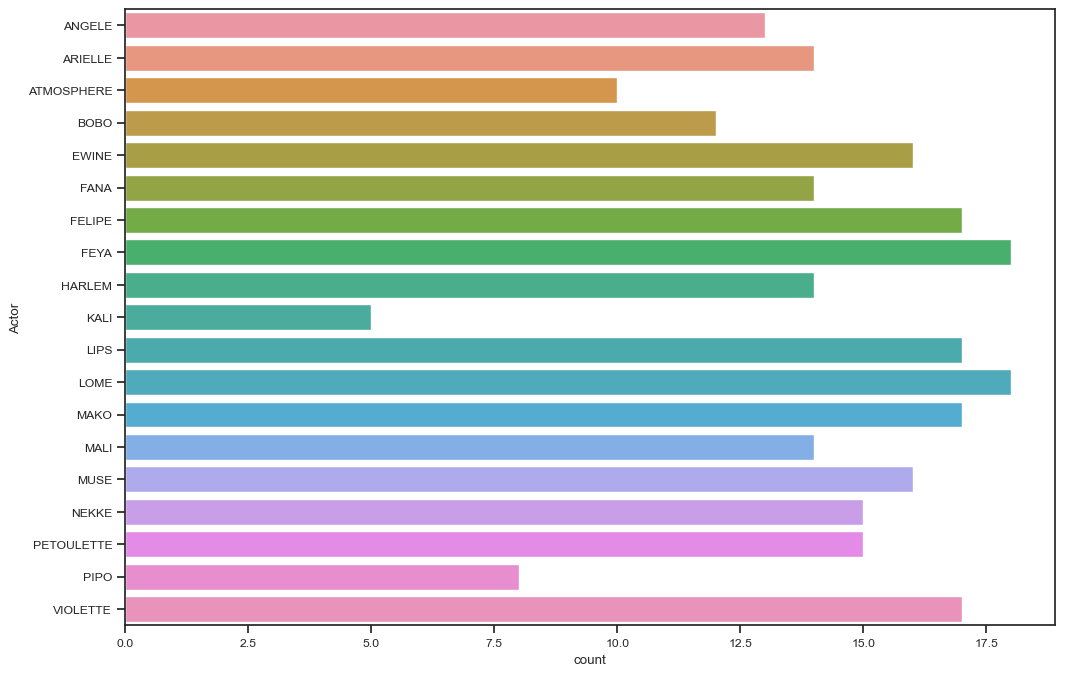

In [38]:
# Display the total number of behavior observations by actor
sns.set_theme(context="notebook", style="ticks", font_scale=.8, rc={'figure.figsize':(12,8)}, color_codes=True)

# Display the count of all behaviors for each Actor
sns.countplot(data=pivot1, y='Actor') 
plt.show()

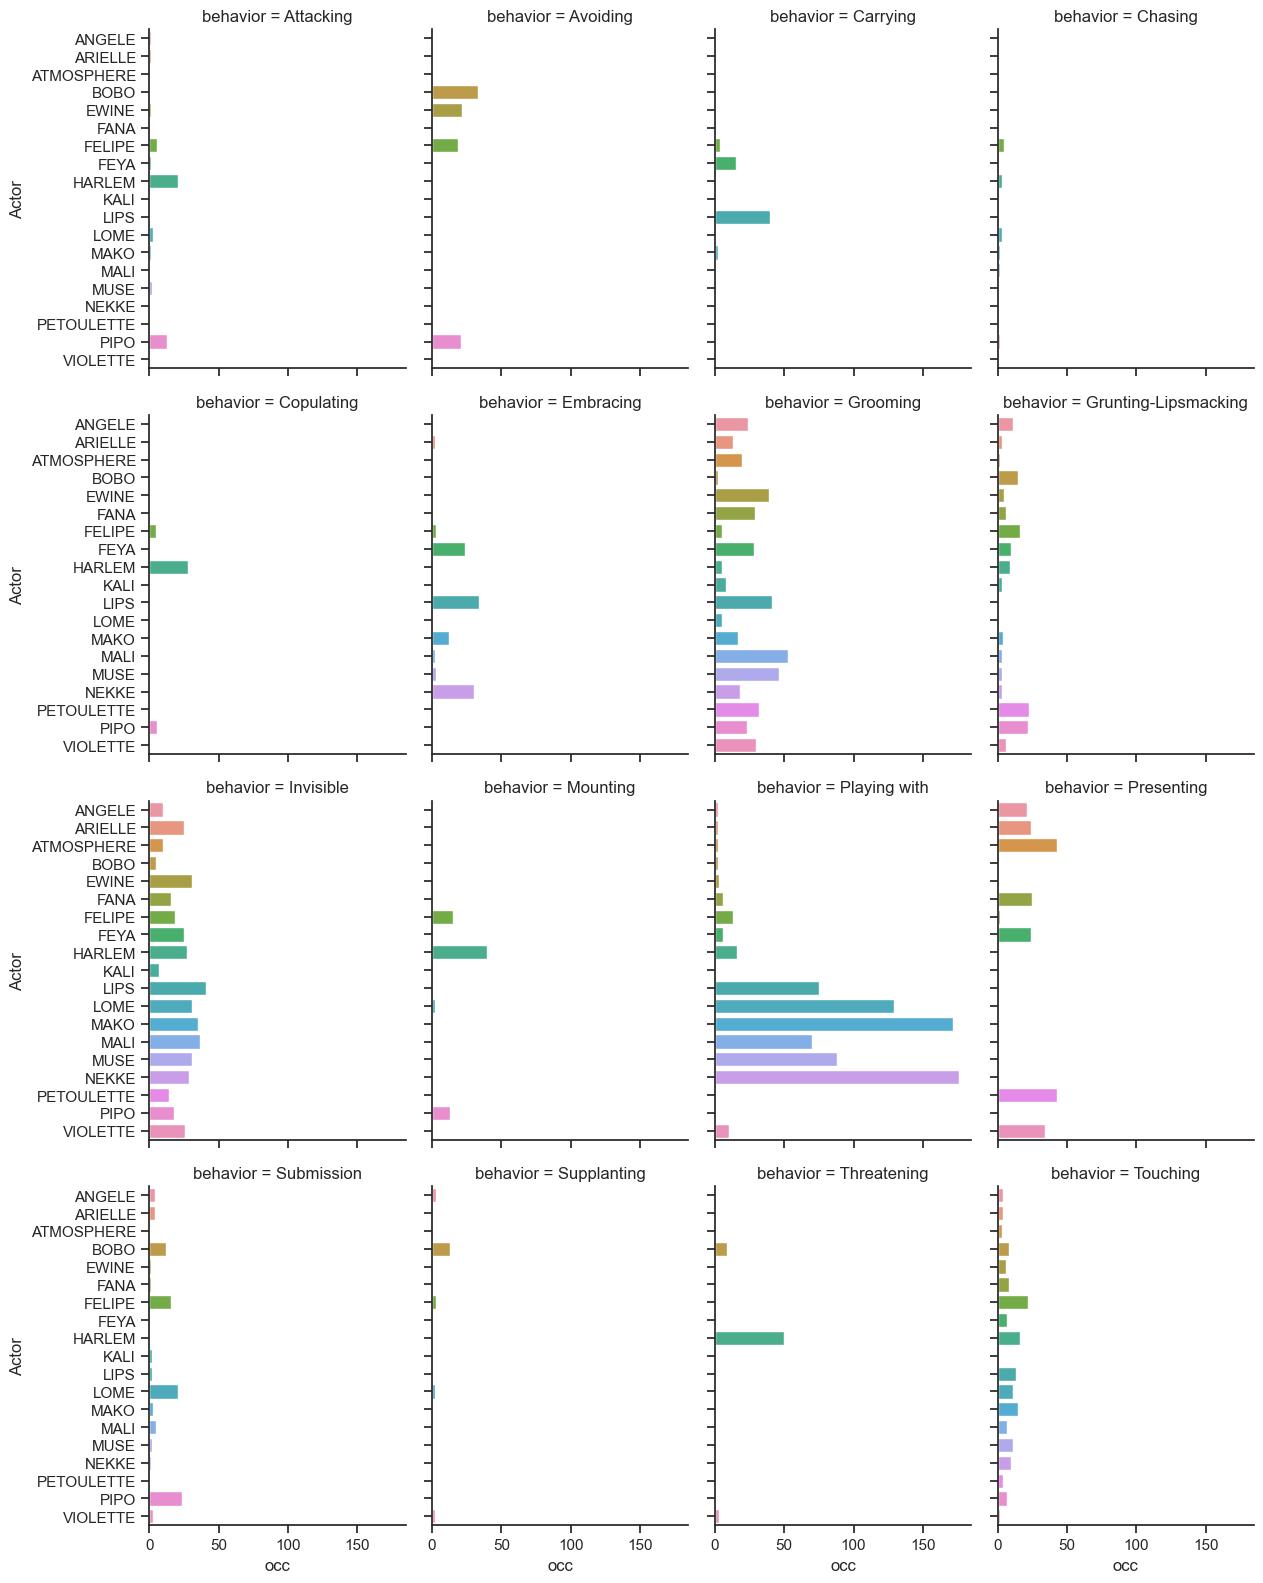

In [39]:
# Display the number of onservations by behavior category for each actor
sns.set_theme(style="ticks")
plot = sns.catplot(x='occ', y='Actor', col='behavior', kind="bar", data=test,  height=4,\
                  col_wrap=4, aspect=.8)
plt.show()

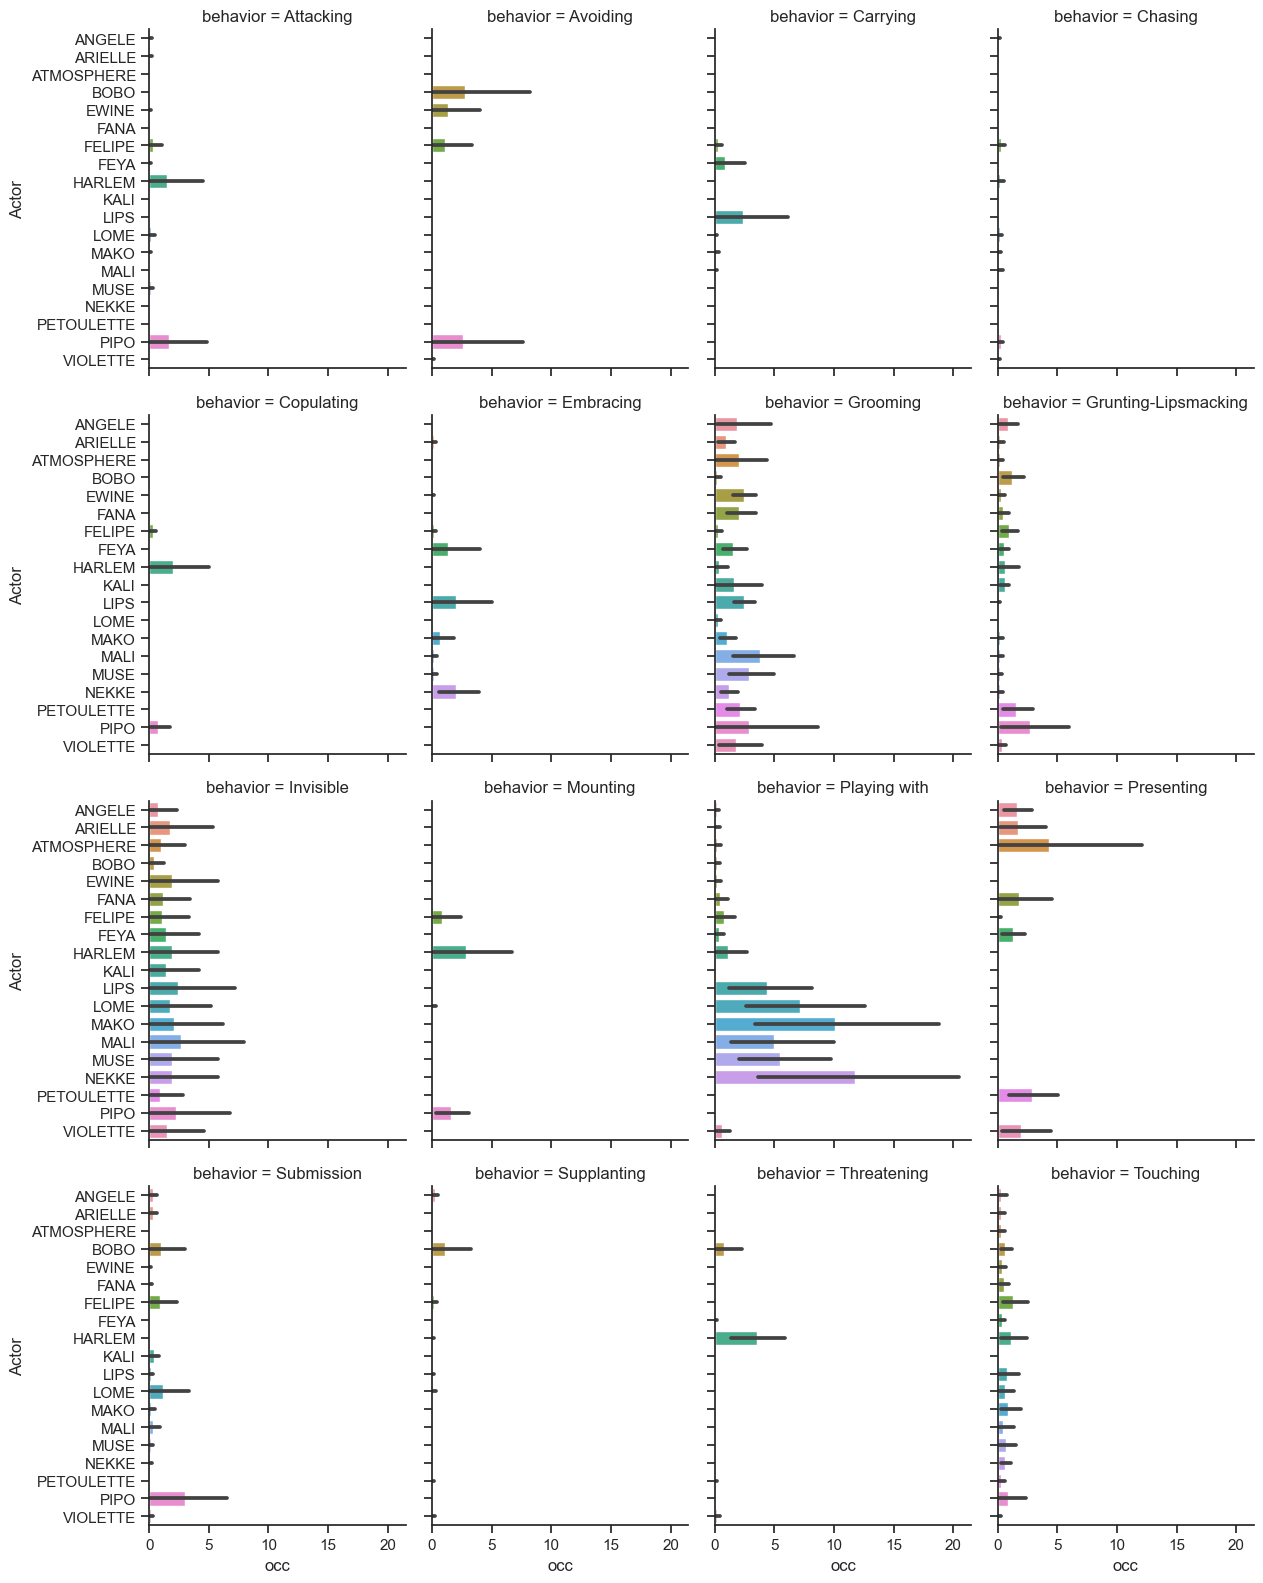

In [40]:
# Display the number of onservations by behavior category for each actor
sns.set_theme(style="ticks")
plot = sns.catplot(x='occ', y='Actor', col='behavior', kind="bar", data=long_pivot,  height=4,\
                  col_wrap=4, aspect=.8)
plt.show()

## Part 2 -
### Feature Selections


In [41]:
# Use pivot2 for input for feature selection tests

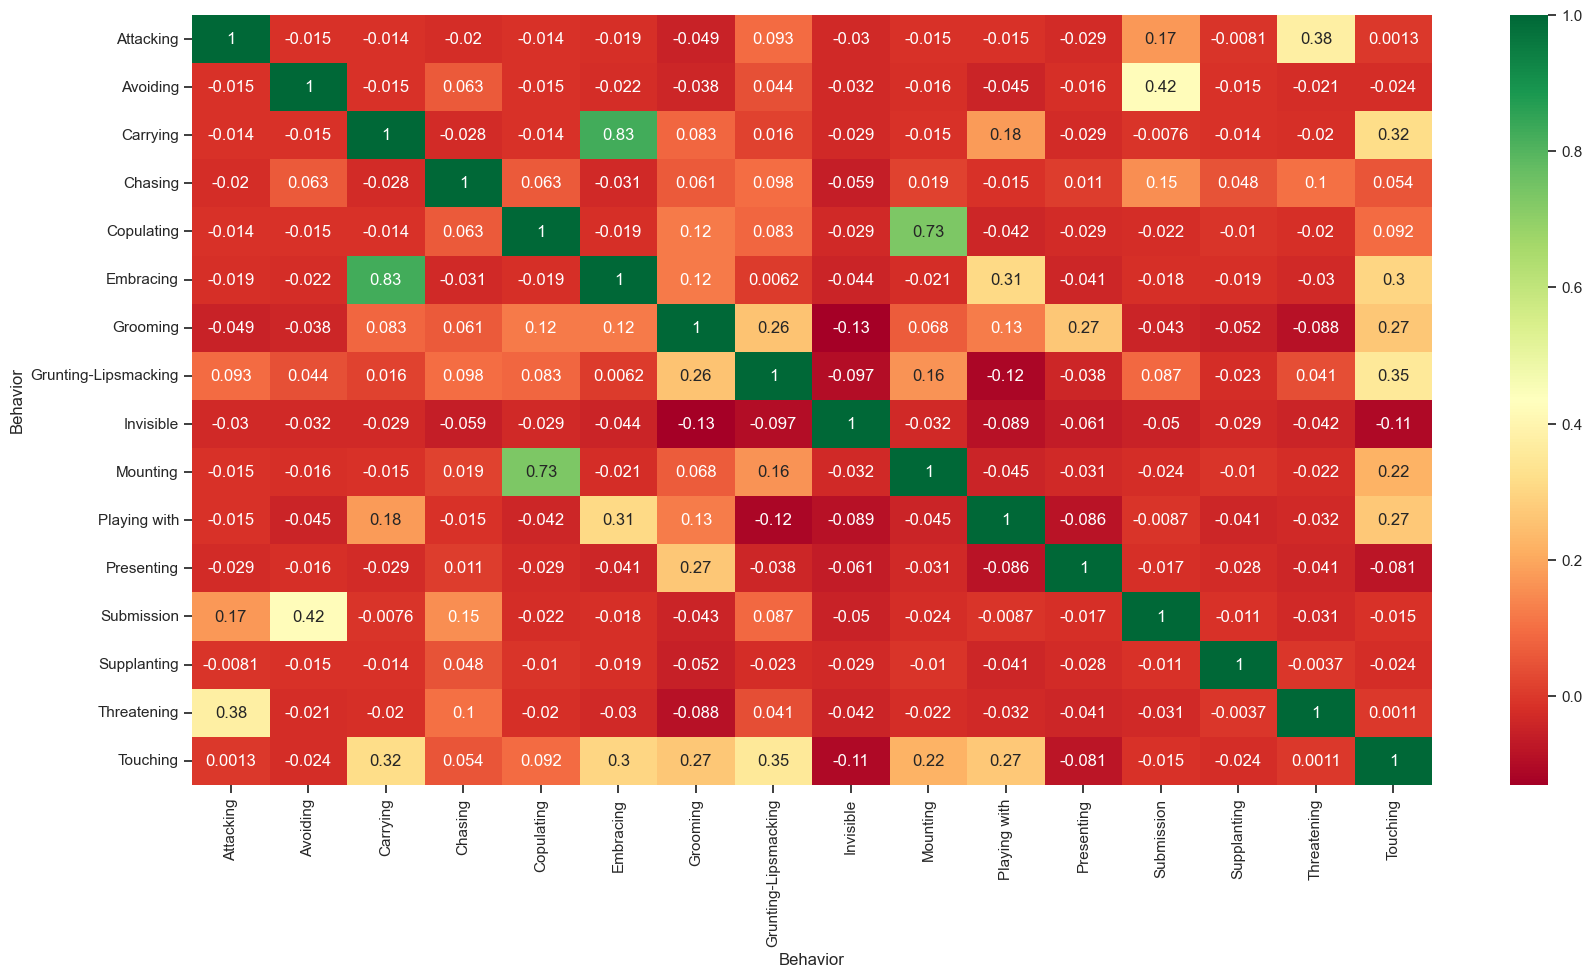

In [42]:
# get correlations of each features in dataset

corrmat = pivot2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

# Plot heatmap using seaborn
g=sns.heatmap(pivot2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [43]:

# Identify and drop highly correlated column based upon the correlation matrix and a value >.95

corr_matrix = pivot2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                          k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

## Feature selection using Chi Square 

In [44]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = pivot2.iloc[:,0:]  
y = pivot2['Invisible']    

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Behavior','Score']

print(featureScores.nlargest(18, 'Score')) 

                Behavior        Score
8              Invisible  7017.347826
10          Playing with    58.438247
6               Grooming    33.155378
11            Presenting    16.350598
15              Touching    11.960159
7   Grunting-Lipsmacking    10.976096
5              Embracing     8.402390
12            Submission     7.645418
1               Avoiding     7.266932
9               Mounting     5.298805
14           Threatening     4.844622
2               Carrying     4.768924
0              Attacking     3.784861
4             Copulating     2.952191
13           Supplanting     1.968127
3                Chasing     1.438247


## Use RFE for Feature Selection 

In [45]:
# Feature Extraction Using RFE

# Convert Dataframe into Numpy Array
arr = pivot2.values
arr.shape

# Create subsets for the LogisticsRegression Model
X = arr[:,0:15]
Y = arr[:,15]

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=16, verbose=1)
fit = rfe.fit(X, Y)

print(f'Num Features: {fit.n_features_}')
print(f'Selected Features: {fit.support_}')
print(f'Feature Ranking: {fit.ranking_}')


Num Features: 15
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Part 3
### Model Selection and Evaluation For 1st Prediction 

In [46]:
# Predict Sex based upon behavior and number of occurrences

# Need to convert categorical to numbers
# Had the Actor in the dataframe but results for the Sex prediction came out to 1 for all models so I removed the Actor column

cat_features = ['behavior']
labels = long_pivot['Actor']
data_cat = long_pivot[cat_features]

# One Hot Encoding for the Behavior features
data_cat_dummies = pd.get_dummies(data_cat)


In [47]:
#Train and Split the Dataset into Training and Testing
# Don't include 'occ' as this is a summation and not a behavior category
data_model_X = pd.concat([labels, data_cat_dummies], axis=1)

In [48]:
#Train and Split the Dataset into Training and Testing
# Don't include 'occ' as this is a summation and not a behavior category
data_model_X = pd.concat([labels, data_cat_dummies], axis=1)


In [49]:
# create a whole target dataset that can be used for train and validation data splitting
# replace the numerical values with strings 
#data_model_y = long_pivot['Sex']

data_model_y = long_pivot['Sex']

In [50]:
# separate data into training and validation and check the details of the datasets
# import packages

from sklearn.model_selection import train_test_split

In [51]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=8)


In [52]:
# Split the name column from the numerical data in train set
# Want to use the labels in the predictions for comparision


X_labels = X_train['Actor'].copy() 
X_train = X_train.iloc[:,1:].copy()
X_train

,behavior_Attacking,behavior_Avoiding,behavior_Carrying,behavior_Chasing,behavior_Copulating,behavior_Embracing,behavior_Grooming,behavior_Grunting-Lipsmacking,behavior_Invisible,behavior_Mounting,behavior_Playing with,behavior_Presenting,behavior_Submission,behavior_Supplanting,behavior_Threatening,behavior_Touching
2039,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
842,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2163,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
928,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2181,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2409,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2033,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [53]:
y_test


3428    2
2919    2
1316    2
547     2
1824    1
       ..
1852    2
3786    2
2438    2
4238    2
3049    1
Name: Sex, Length: 1296, dtype: int64

In [54]:
# Split the name column from the numerical data in validation set

X_vlabels = X_test['Actor'].copy() 
X_test = X_test.iloc[:,1:].copy()
X_test

,behavior_Attacking,behavior_Avoiding,behavior_Carrying,behavior_Chasing,behavior_Copulating,behavior_Embracing,behavior_Grooming,behavior_Grunting-Lipsmacking,behavior_Invisible,behavior_Mounting,behavior_Playing with,behavior_Presenting,behavior_Submission,behavior_Supplanting,behavior_Threatening,behavior_Touching
3428,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2919,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1316,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
547,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1824,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2438,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
# Print number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

No. of samples in training set:  3024
No. of samples in validation set: 1296


In [56]:
# Sex Male or Female or Unknown
print('\n')
print('The SEX in training set:')
print(y_train.value_counts())



The SEX in training set:
2    1922
1    1102
Name: Sex, dtype: int64


In [57]:
# Sex in validation set
print('\n')
print('Sex in the validation set:')
print(y_test.value_counts())



Sex in the validation set:
2    798
1    498
Name: Sex, dtype: int64


In [58]:
#  Import packages

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder



## Logistics Regression Model

In [59]:
# Fit the model and compute predictions

model = LogisticRegression(multi_class="auto", solver="liblinear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Accuracy of logistic regression classifier on test set: {model.score(X_test, y_test)}')

Accuracy of logistic regression classifier on test set: 0.6157407407407407


In [61]:
from sklearn.kernel_ridge import KernelRidge
kr_model  = KernelRidge(alpha=1.0, kernel='rbf', gamma=10000)
kr_model.fit(X_train, y_train)

print(f'Accuracy of KernelRidge on test set: {kr_model.score(X_test, y_test)}')

Accuracy of KernelRidge on test set: -0.003796656394586151


## SVC Model

In [62]:
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'rbf', gamma = .01, C = 100000)
SVC_model.fit(X_train, y_train)
SVC_pred = SVC_model.predict(X_test)
print(f'Accuracy of SVC on test set: {SVC_model.score(X_test, y_test)}')

Accuracy of SVC on test set: 0.6157407407407407


In [63]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')
params = {"C":[1, 5, 30], "gamma": [1000,2000,4000]}
grid_search = GridSearchCV(svc, params)
grid_search.fit(X_train, y_train)
print(f'Accuracy of SVC GridSearch on test set: {grid_search.score(X_test, y_test)}')

Accuracy of SVC GridSearch on test set: 0.6157407407407407


## Random Forest Classifier Model

In [64]:
rf_model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f'Accuracy of Random Forest classifier on test set: {rf_model.score(X_test, y_test)}')

Accuracy of Random Forest classifier on test set: 0.6157407407407407


In [65]:
# Use long_pivot df and delete rows with females
# Only need the males for this prediction
new_pivot = long_pivot[long_pivot['Sex'] == 1] 


## Ordinal Regression Model

In [66]:
# Need to convert categorical to numbers

cat_features = ['behavior']
labels = new_pivot['Actor']
data_cat = new_pivot[cat_features]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)


In [67]:
# Create target variables column
# Assign rank to each male

ranks = [
    (new_pivot['Actor'] == 'HARLEM'), 
    (new_pivot['Actor'] == 'PIPO'),  
    (new_pivot['Actor'] == 'FELIPE'),
    (new_pivot['Actor'] == 'BOBO'),
    (new_pivot['Actor'] == 'EWINE'),
    (new_pivot['Actor'] == 'MAKO'),
    (new_pivot['Actor'] == 'MUSE')]
     
values =  [0,1,2,3,4,5,6] 

new_pivot['Rank'] = np.select(ranks, values)
data_model_y = new_pivot['Rank']


In [68]:
# Create full data set for Ordinal Regression 
data_model_X = pd.concat([labels, data_cat_dummies], axis=1)

# Create dataframe to store target data_model_y
# Make a copy of the target set

k_df = data_model_X.iloc[:,1:].copy()
k_df['Rank'] = data_model_y

In [69]:
# Split and train the models
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)


In [70]:
# Remove Actor from X_val set
X_val = X_val.iloc[:,1:].copy()

In [71]:
# Split the name column from the numerical data in train set
# Want to use the labels in the predictions for comparision

X_labels = X_train['Actor'].copy() 
X_train = X_train.iloc[:,1:].copy()


In [72]:
# Print number of samples in each set
print("No. of samples in X training set: ", X_train.shape[0])
print("No. of samples in X validation set:", X_val.shape[0])

No. of samples in X training set:  1120
No. of samples in X validation set: 480


In [73]:
# Print number of samples in each set
print("No. of samples in y training set: ", y_train.shape[0])
print("No. of samples in y validation set:", y_val.shape[0])

No. of samples in y training set:  1120
No. of samples in y validation set: 480


In [74]:
# Use the MORD module.  Performs several types of Ordinal Regression
# https://pypi.org/project/mord/
import mord 
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ['HARLEM', 'PIPO', 'FELIPE', 'BOBO', 'EWINE', 'MAKO', 'MUSE']

## LogAT Model

In [75]:
# Instantiate the three types of Ordinal Regression for comparison
# Threshold based 
model1 = mord.LogisticAT(alpha=1.)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_val)

print(f'Mean Absolute Error of LogisticAT is: \
      {metrics.mean_absolute_error(y_val, y_pred)}')

print(f'LogAT score: {model1.score(X_val, y_val)}')
print(f'LogAT accuracy score: {metrics.accuracy_score(y_val, y_pred, normalize=False)}\n')
print(f'LogAT Classification Report')
print(f'{metrics.classification_report(y_val, y_pred)}')


Mean Absolute Error of LogisticAT is:       1.8416666666666666
LogAT score: -1.8416666666666666
LogAT accuracy score: 59

LogAT Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        78
           3       0.10      0.53      0.16        49
           4       0.16      0.46      0.23        71
           5       0.00      0.00      0.00        91
           6       0.00      0.00      0.00        76

    accuracy                           0.12       480
   macro avg       0.04      0.14      0.06       480
weighted avg       0.03      0.12      0.05       480



## LogIT Model

In [76]:
# Instantiate the three types of Ordinal Regression for comparison
# Threshold based 
model2 = mord.LogisticIT(alpha=1.)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_train)

print(f'Mean Absolute Error of LogisticIT is: \
      {metrics.mean_absolute_error(y_pred, y_train)}')
print(f'LogIT score: {model2.score(X_val, y_val)}')
print(f'LogIT accuracy score: {metrics.accuracy_score(y_train, y_pred, normalize=False)}\n')
print(f'LogIT Classification Report')
print(f'{metrics.classification_report(y_train, y_pred)}')

Mean Absolute Error of LogisticIT is:       2.1294642857142856
LogIT score: 0.14583333333333334
LogIT accuracy score: 197

LogIT Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.00      0.00      0.00        83
           2       0.17      0.69      0.28       194
           3       0.00      0.00      0.00       143
           4       0.00      0.00      0.00       185
           5       0.00      0.00      0.00       181
           6       0.18      0.36      0.24       180

    accuracy                           0.18      1120
   macro avg       0.05      0.15      0.07      1120
weighted avg       0.06      0.18      0.09      1120



In [77]:
# Compute Multi-class cm

cm = metrics.multilabel_confusion_matrix(y_train, y_pred)


## Ordinal Ridge Model

In [78]:
# Ordinal Ridge
model3 = mord.OrdinalRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
model3.fit(X_train, y_train)

y_pred = model3.predict(X_train)

print(f'Mean Absolute Error of ordinalridge is: \
      {metrics.mean_absolute_error(y_pred, y_train)}')
print(f'OrdinalRidge score: {model3.score(X_val, y_val)}')
print(f'OrdinalRidge accuracy score: {metrics.accuracy_score(y_train, y_pred, normalize=False)}\n')
print(f'OrdinalRidge Classification Report')
print(f'{metrics.classification_report(y_train, y_pred)}')

Mean Absolute Error of ordinalridge is:       1.7044642857142858
OrdinalRidge score: -4.18125
OrdinalRidge accuracy score: 143

OrdinalRidge Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00       194
           3       0.13      1.00      0.23       143
           4       0.00      0.00      0.00       185
           5       0.00      0.00      0.00       181
           6       0.00      0.00      0.00       180

    accuracy                           0.13      1120
   macro avg       0.02      0.14      0.03      1120
weighted avg       0.02      0.13      0.03      1120



# 4 Subgroups using clustering algorithms

In [79]:

# Use the long pviot as this has the behavior and actor and number of occurences
 

In [80]:
# Kmodes
from kmodes.kmodes import KModes


In [81]:
# create a subset from long_pivot
x_data = long_pivot[['Actor', 'behavior']].copy()

In [82]:


# One Hot Encoding 

X_beh = pd.get_dummies(x_data['behavior'], )
X_Act = pd.get_dummies(x_data['Actor'])
data_model_X = pd.concat([X_beh, X_Act], axis=1)

# Convert dataframe to array

data_model_X = np.array(data_model_X)



In [83]:
### Kmodes

In [86]:
# Run Kmodes clustering

km = KModes(n_clusters=3, init='Cao', n_init=2, verbose=2)
model = km.fit_predict(data_model_X)

# append clusters to dataset
x_data['clusters'] = km.labels_
x_data['clusters'].unique()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 469, cost: 8080.0
Run 1, iteration: 2/100, moves: 34, cost: 8080.0


array([0, 2, 1], dtype=uint16)

In [113]:
### Affinity Propagation

In [114]:

from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10

# define the model
model2 = AffinityPropagation(damping=0.9)

# fit the model
model2.fit(data_model_X)

# assign a cluster to each example
clus = model2.predict(data_model_X)

# retrieve unique clusters
# Assign clusters to data model

x_data['A_cluster'] = clus



In [115]:
x_data['A_cluster']

0         0
1         0
2         0
3         0
4         0
       ... 
4315    286
4316    286
4317    286
4318    286
4319    286
Name: A_cluster, Length: 4320, dtype: int64